# Questão 1

In [137]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [138]:
df['target'] = cancer_data.target
df.target.value_counts()

,count
target,
1,357
0,212


In [139]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [140]:
count_class_0, count_class_1 = df.target.value_counts()
count_class_0, count_class_1

(357, 212)

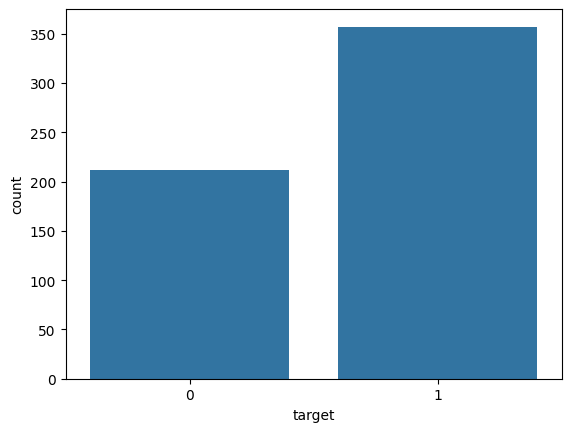

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.show()

In [142]:
target_0 = df[df['target'] == 0]
target_1 = df[df['target'] == 1]

target_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              212 non-null    float64
 1   mean texture             212 non-null    float64
 2   mean perimeter           212 non-null    float64
 3   mean area                212 non-null    float64
 4   mean smoothness          212 non-null    float64
 5   mean compactness         212 non-null    float64
 6   mean concavity           212 non-null    float64
 7   mean concave points      212 non-null    float64
 8   mean symmetry            212 non-null    float64
 9   mean fractal dimension   212 non-null    float64
 10  radius error             212 non-null    float64
 11  texture error            212 non-null    float64
 12  perimeter error          212 non-null    float64
 13  area error               212 non-null    float64
 14  smoothness error         212 no

Undersampling

In [143]:
target_1_undersample = target_1.sample(count_class_1)
target_1_undersample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 510 to 511
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              212 non-null    float64
 1   mean texture             212 non-null    float64
 2   mean perimeter           212 non-null    float64
 3   mean area                212 non-null    float64
 4   mean smoothness          212 non-null    float64
 5   mean compactness         212 non-null    float64
 6   mean concavity           212 non-null    float64
 7   mean concave points      212 non-null    float64
 8   mean symmetry            212 non-null    float64
 9   mean fractal dimension   212 non-null    float64
 10  radius error             212 non-null    float64
 11  texture error            212 non-null    float64
 12  perimeter error          212 non-null    float64
 13  area error               212 non-null    float64
 14  smoothness error         212 

In [144]:
df_test_undersample = pd.concat([target_1_undersample, target_0], axis=0)
df_test_undersample.target.value_counts()

,count
target,
1,212
0,212


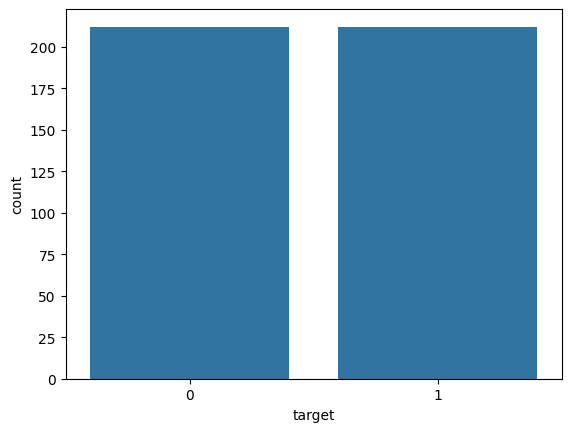

In [145]:
sns.countplot(x='target', data=df_test_undersample)
plt.show()

Oversampling

In [146]:
target_0_oversample = target_0.sample(count_class_0, replace=True)
target_0_oversample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 36 to 352
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              357 non-null    float64
 1   mean texture             357 non-null    float64
 2   mean perimeter           357 non-null    float64
 3   mean area                357 non-null    float64
 4   mean smoothness          357 non-null    float64
 5   mean compactness         357 non-null    float64
 6   mean concavity           357 non-null    float64
 7   mean concave points      357 non-null    float64
 8   mean symmetry            357 non-null    float64
 9   mean fractal dimension   357 non-null    float64
 10  radius error             357 non-null    float64
 11  texture error            357 non-null    float64
 12  perimeter error          357 non-null    float64
 13  area error               357 non-null    float64
 14  smoothness error         357 n

In [147]:
df_test_oversample = pd.concat([target_0_oversample, target_1], axis=0)
df_test_oversample.target.value_counts()

,count
target,
0,357
1,357


# Questão 2

In [148]:
from sklearn.datasets import fetch_openml
import numpy as np

yeast = fetch_openml(name='yeast', version=1)

In [149]:
np.bincount(yeast.target.cat.codes)

array([463,   5,  35,  44,  51, 163, 244, 429,  20,  30])

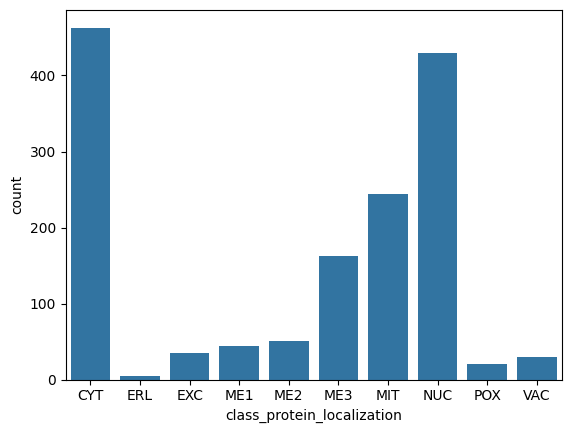

In [150]:
sns.countplot(x=yeast.target)
plt.show()

In [151]:
from imblearn.over_sampling import SMOTE

In [152]:
smote = SMOTE(k_neighbors=4) # k_neighbors >= 5 gera erro nesse dataset: ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 5, n_samples = 5

X_smote, y_smote = smote.fit_resample(yeast.data, yeast.target)

In [153]:
np.bincount(y_smote.cat.codes)

array([463, 463, 463, 463, 463, 463, 463, 463, 463, 463])

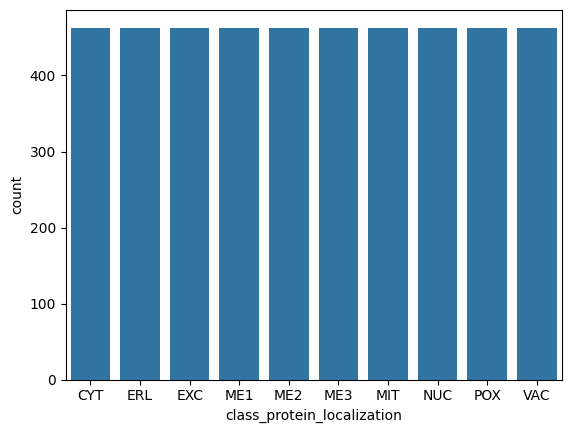

In [154]:
sns.countplot(x=y_smote)
plt.show()